# Different approaches to deal with missing data

[original notebook](https://github.com/Hussam1/dealing_with_missing_values)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

There are two types of null values that are to be considered. The 'None' type, which is a built-in python DataType. And the other is 'np.nan' of Numpy, which stands for Not a Number.


- 'None': Performing logical operations as 'None or True' returns True. In addition 'None' does not support arithmetic operations like addition or division and returns a 'TypeError'. And checking for 'None' equals to None' returns 'True' 
- 'np.nan': Performing logical operations as np.nan or True' returns np.nan itself as the output. In addition np.nan' does not show any difference in its output while doing arithmetic operations like addition or division. np.nan states that an undefined number cannot be equal to itself (np.nan == np.nan) and thereby returns 'False' so we use np.isnan(np.nan) instead 

In [2]:
try:
  # Print the sum of two None's
  print("Add operation output of 'None': ", None + None)

except TypeError:
  # Print if error
  print("'None' does not support Arithmetic Operations!!")
    
try:
  # Print the sum of two np.nan's
  print("Add operation output of 'np.nan': ", np.nan + np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Arithmetic Operations!!")
    

try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")
    
    
try:
  # Print the output of logical OR of two np.nan's
  print("OR operation output of 'np.nan': ", np.nan or np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Logical Operations!!")

'None' does not support Arithmetic Operations!!
Add operation output of 'np.nan':  nan
OR operation output of 'None':  None
OR operation output of 'np.nan':  nan


In [3]:
try:
  # Print the comparison of two 'None's
  print("'None' comparison output: ", None == None)

except TypeError:
  # Print if error
  print("'None' does not support this operation!!")
    
try:
  # Print the comparison of two 'np.nan's
  print("'np.nan' comparison output: ", np.nan == np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support this operation!!")
    
try:
  # Check if 'None' is 'NaN'
  print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")
    
try:
  # Check if 'np.nan' is 'NaN'
  print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

'None' comparison output:  True
'np.nan' comparison output:  False
Function 'np.isnan()' does not support this Type!!
Is 'np.nan' same as nan?  True


In [4]:
df = pd.read_csv('diabetes.csv')
# Print the info of df to an understanding of the df status
print(df.info())

# Store unique values of 'Glucose' column to 'col_unique'
col_unique = df.Glucose.unique()

# Print the sorted values of col_unique
print(np.sort(col_unique))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
[ 44.  56.  57.  61.  62.  65.  67.  68.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 12

## Detecting missing values

In [5]:
# Load the airquality dataset
df = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')

# Create a nullity DataFrame df_nullity
df_nullity = df.isnull()
print(df_nullity.head())

# Calculate total of missing values
missing_values_sum = df_nullity.sum()
print('\nTotal Missing Values:\n', missing_values_sum)

# Calculate percentage of missing values
missing_values_percent = df_nullity.mean() * 100
print('\nPercentage of Missing Values:\n', missing_values_percent)

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


**Using missingno package**

<AxesSubplot:>

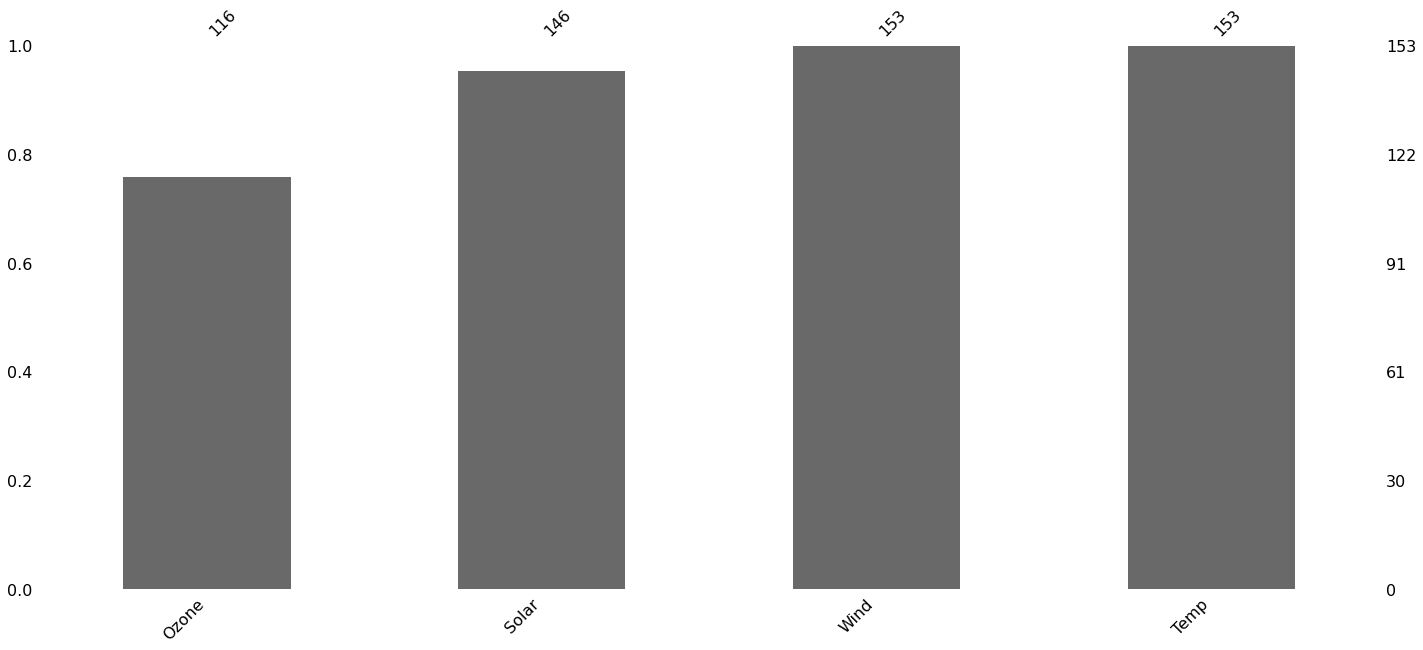

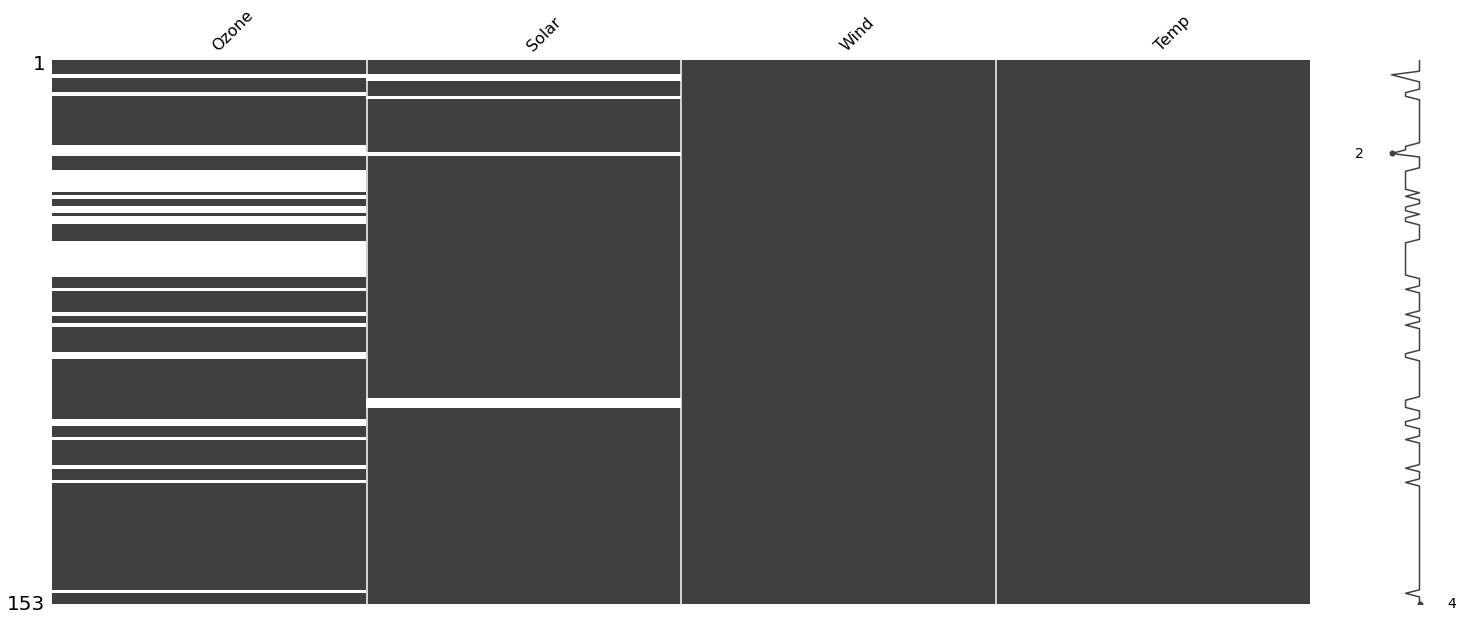

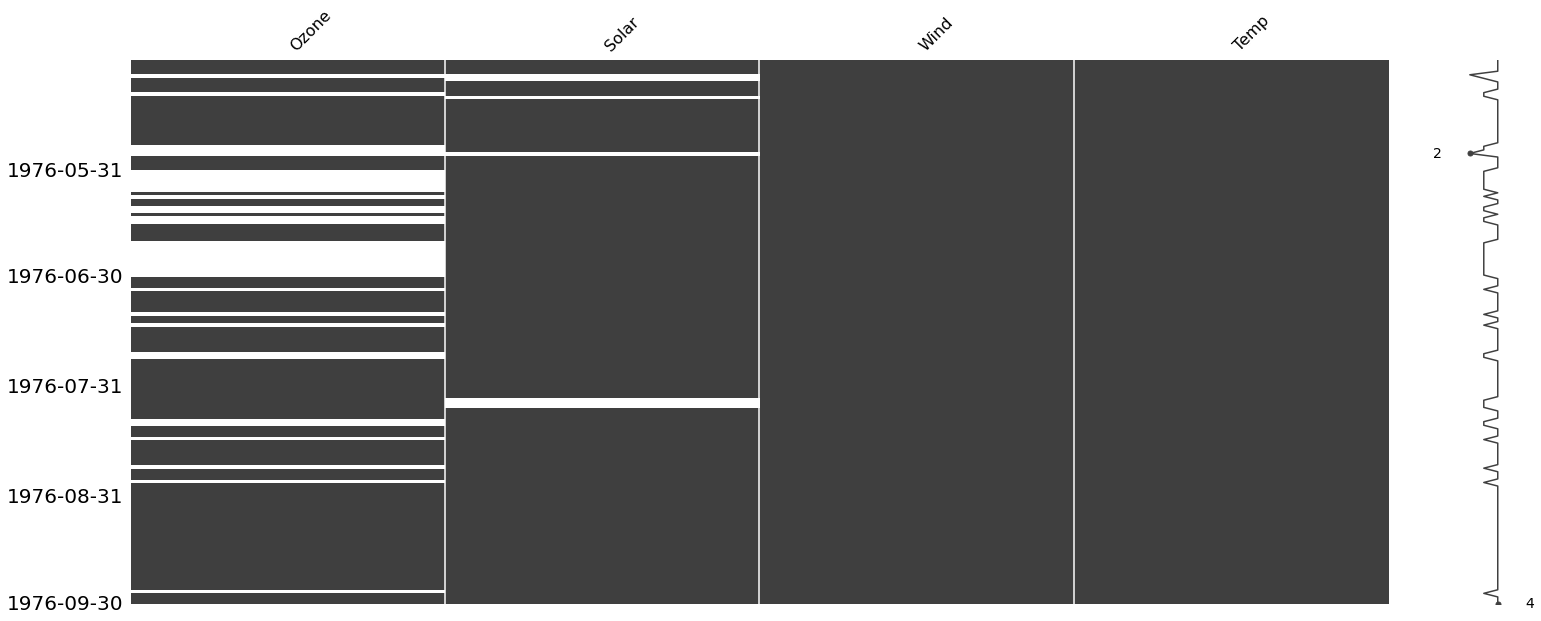

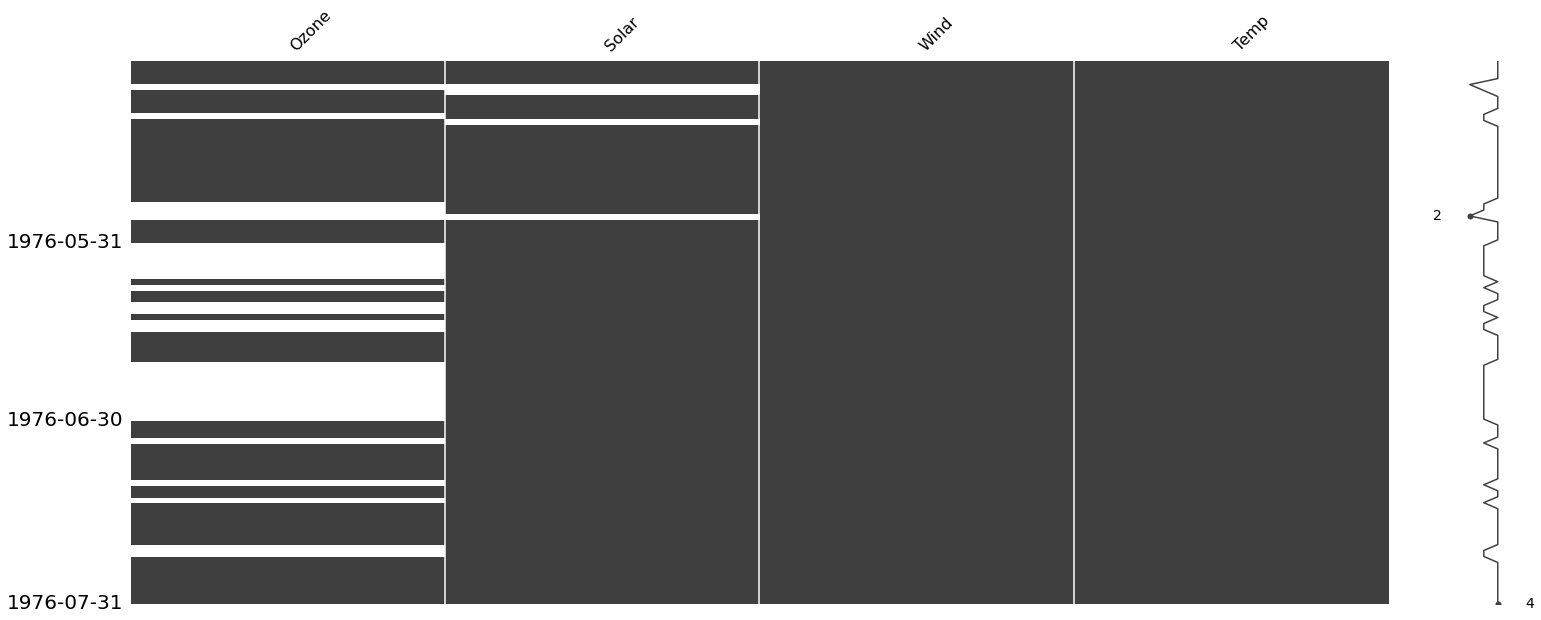

In [6]:
# Import missingno as msno
import missingno as msno

# Plot amount of missingness
msno.bar(df)

# Plot nullity matrix of df
msno.matrix(df)

# Plot nullity matrix of df with frequency 'M'
msno.matrix(df, freq='M')

# Plot the sliced nullity matrix of df with frequency 'M'
msno.matrix(df.loc['May-1976': 'Jul-1976'], freq='M')

**Is the data missing at random** 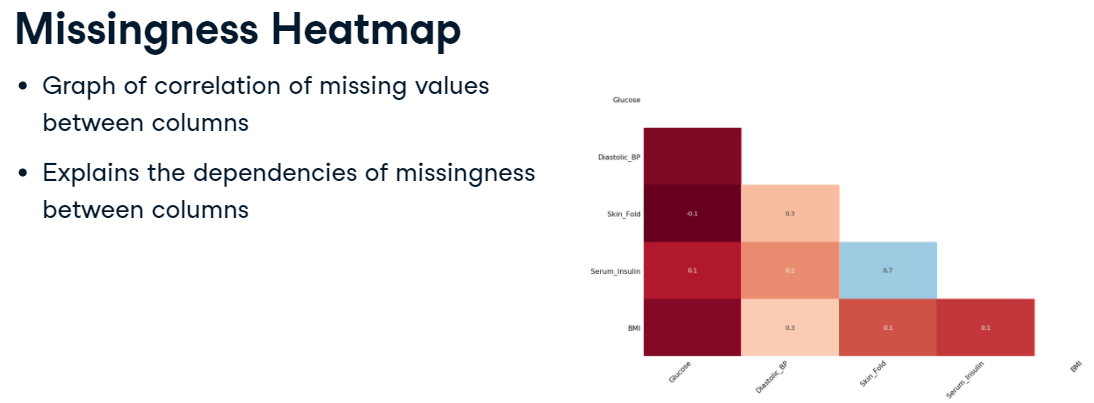

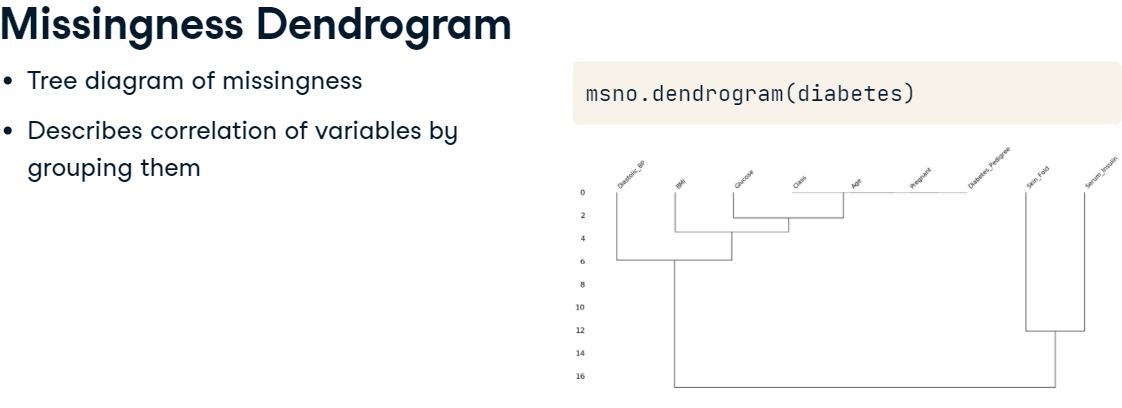

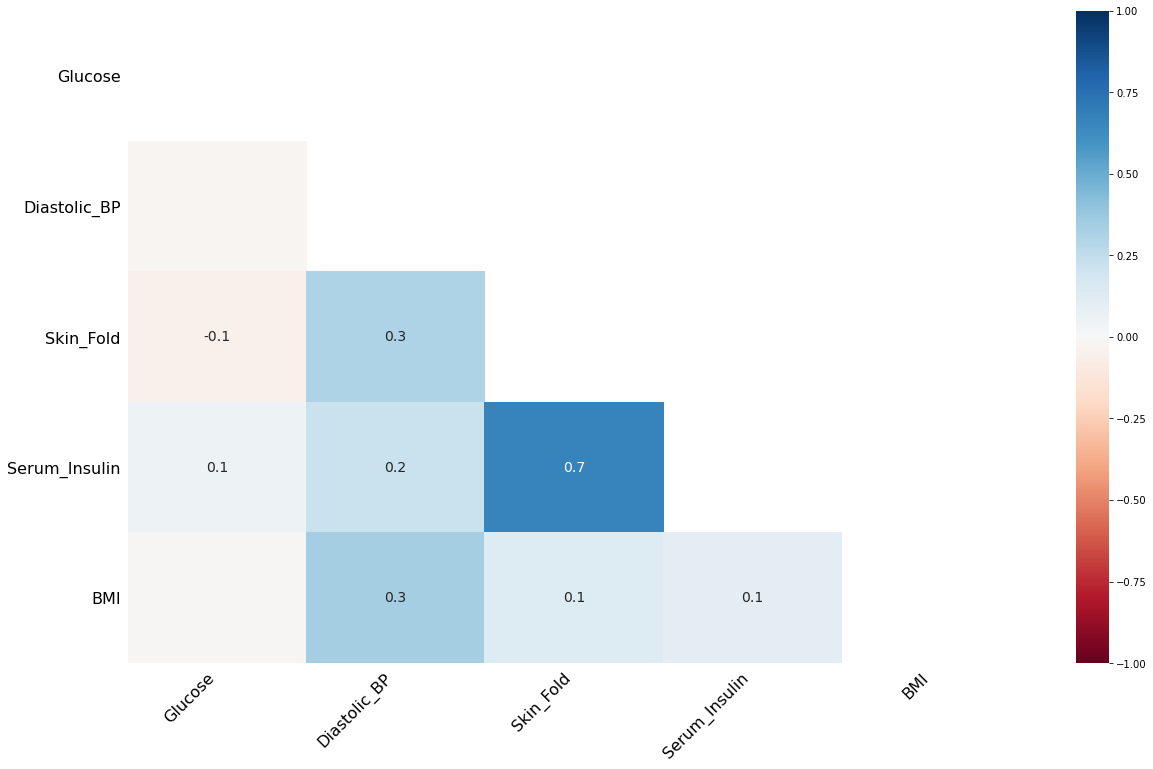

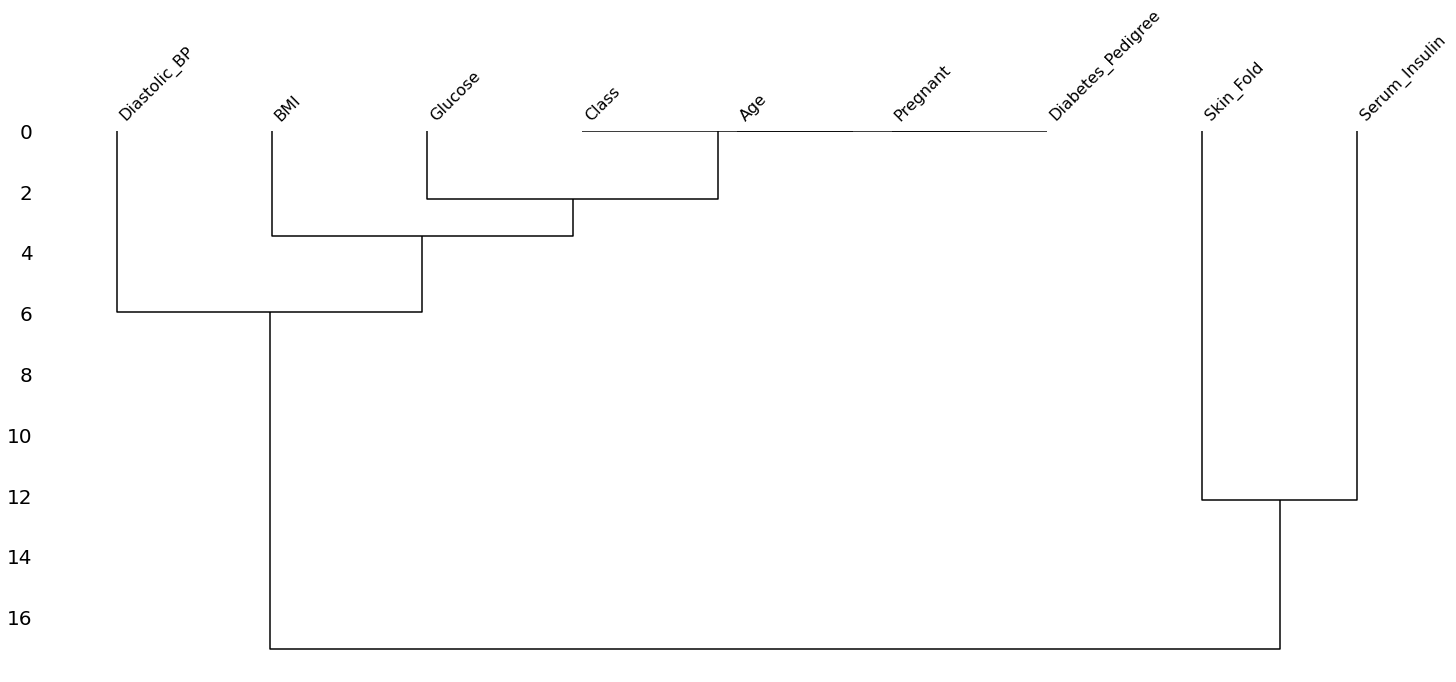

In [13]:
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Plot missingness heatmap of df
msno.heatmap(df)

# Plot missingness dendrogram of df
msno.dendrogram(df)

# Show plot
plt.show()

## Handling missing values

Missing values in a dataset can either be dropped or filled (they aren't usually left missing). We'll not look at how to drop them (it is straightforward). We'll see how to fill them with dummy values

### Imputation

The simplest ways to impute missing values is by using either constants like "0" or simple statistical parameters like mean, median and mode.

*We can first create a copy of the original dataset in order to compare them later*

In [17]:
 from sklearn.impute import SimpleImputer

# Make a copy of diabetes
df_mean = df.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')
# Impute mean values in the DataFrame df_mean
df_mean.iloc[:, :] = mean_imputer.fit_transform(df_mean)


# Make a copy of diabetes
df_median = df.copy(deep=True)
# Create median imputer object
median_imputer = SimpleImputer(strategy='median')
# Impute median values in the DataFrame df_median
df_median.iloc[:, :] = median_imputer.fit_transform(df_median)



# Make a copy of diabetes
df_mode = df.copy(deep=True)
# Create mode imputer object
mode_imputer = SimpleImputer(strategy="most_frequent")
# Impute using most frequent value in the DataFrame mode_imputer
df_mode.iloc[:, :] = mode_imputer.fit_transform(df_mode)


# Make a copy of diabetes
df_constant = df.copy(deep=True)
# Create median imputer object
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)
# Impute missing values to 0 in diabetes_constant
df_constant.iloc[:, :] = constant_imputer.fit_transform(df_constant)

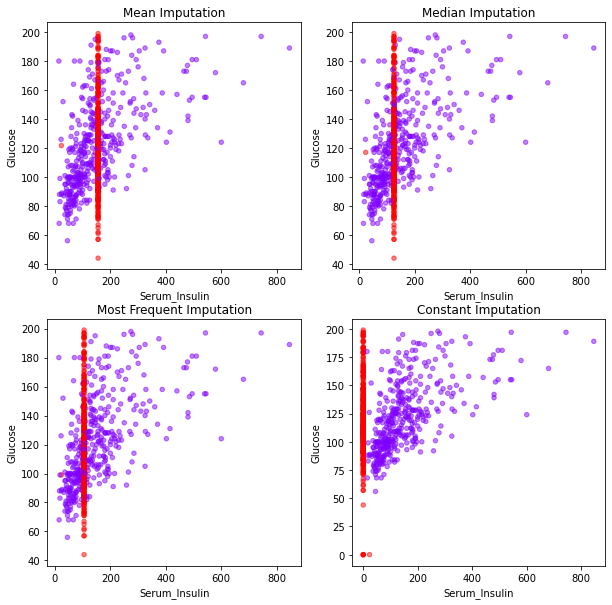

In [20]:
## visualize the 4 different methods using this code

# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = df.Serum_Insulin.isnull()+df.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': df_mean, 'Median Imputation': df_median, 
               'Most Frequent Imputation': df_mode, 'Constant Imputation': df_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

Imputing time-series data

- Ffill method
- Bfill method
- the 'interpolate()' method is highly appropriate for imputing time-series data. This method has more complex strategies which can draw patterns from non-missing values to predict missing ones, we are going to explore the 'linear', 'quadratic' and the 'nearest' strategies.

In [22]:
# Load the airquality dataset
airquality = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')

# Fill NaNs using forward fill
airquality.fillna(method='ffill', inplace=True)

# Fill NaNs using backward fill
airquality.fillna(method='bfill', inplace=True)

In [23]:
# Interpolate the NaNs linearly
airquality.interpolate(method='linear', inplace=True)

# Interpolate the NaNs quadratically
airquality.interpolate(method='quadratic', inplace=True)

# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=True)

Visualizing time-series imputations

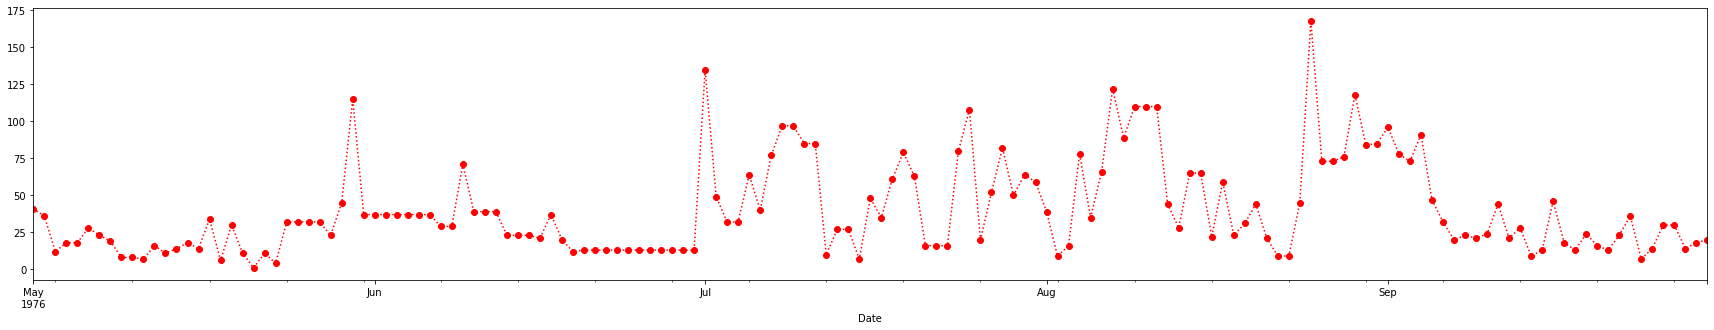

In [24]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

plt.show()

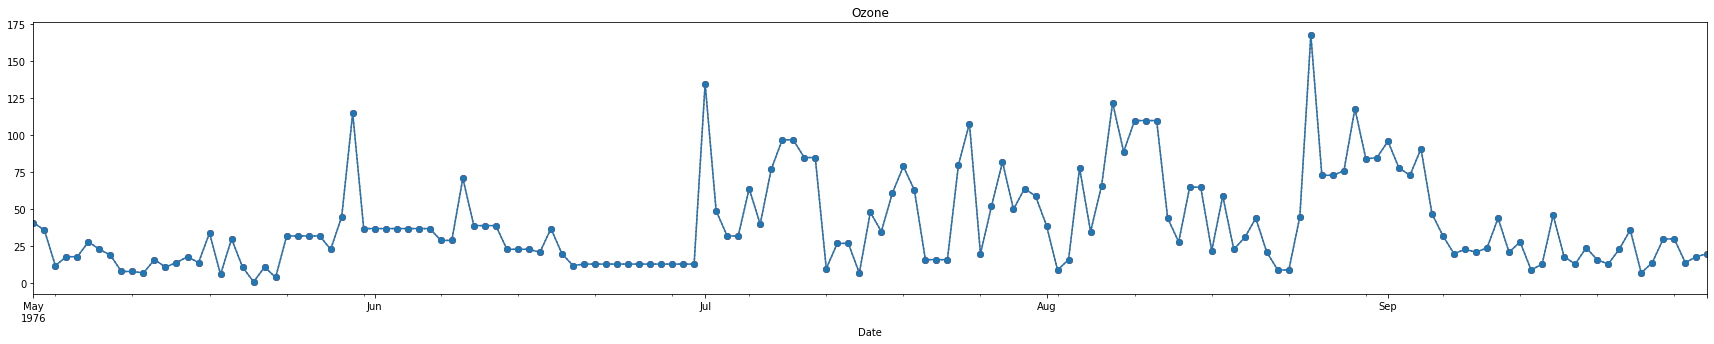

In [25]:
## putting both together

# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

## Imputing using fancyimpute

is a package containing several advanced imputation techniques that use machine learning algorithms to impute missing values.

**K-Nearest Neighbor Imputation**

uses the K-Nearest Neighbor algorithm for predicting the missing values. The KNN algorithm finds the most similar data points using all the non-missing features for a data point and calculates the average of these similar points to fill the missing feature

In [ ]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

**Multiple Imputations by Chained Equations (MICE)**

The MICE imputation is a very robust and complex model for imputing missing values. It imputes using multiple regressions over the data and takes an average value for filling in the missing feature for a data point.

In [ ]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

## Imputing categorical values

The complexity with categorical data is that they are usually strings. Hence, imputations cannot be applied on them. The categorical values must first be converted or encoded to numeric values and then imputed.

In [ ]:
## First we need to encode the cat columns - here we'll use Ordinal enc

## encoding one by one

# Select non-null values of categorical column in df 
categ = df['categorical']
cat_not_null = categ[categ.notnull()]

# Reshape cat_not_null to shape (-1, 1)
reshaped_vals = cat_not_null.values.reshape(-1, 1)


from sklearn.preprocessing import OrdinalEncoder

# Create Ordinal encoder
categorical_ord_enc = OrdinalEncoder()

# Ordinally encode reshaped_vals
encoded_vals = categorical_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of categ in users
df.loc[categ.notnull(), 'categorical'] = np.squeeze(encoded_vals)

In [ ]:
## Alternatively we can create loop to encode all categorical columns

# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [ ]:
## Second we do imputing - here we'll use KNN

# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in users
for col_name in df:
    
    # Reshape the data
    reshaped = df[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    df[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)